In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("heart1.csv")
data.shape

(303, 13)

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,1


In [4]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,1.000000


In [5]:
# EDA

# category to numeric transformation
# missing value imputation

# NO NEED in case of tree based models
# outlier treatment
# standardization
# correlation 

In [6]:
# EDA

# categorical vs target (1/0)
# numeric vs target (1/0)

In [7]:
cat_cols = ['sex','cp','fbs','restecg','exang','slope','ca']
num_cols = ['age','trestbps','chol','oldpeak', 'thalach']
target_col = 'target'

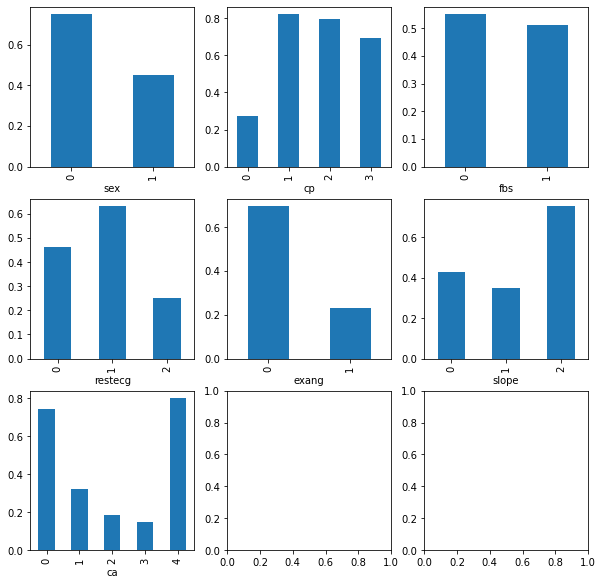

In [13]:
# categorical vs target (1/0)
cat_cols = ['sex','cp','fbs','restecg','exang','slope','ca']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,10))

for indx, eachCol in enumerate(cat_cols):
    data.groupby([eachCol])[target_col].mean().plot(kind='bar', ax=axes[indx//3,indx%3])

<AxesSubplot:xlabel='age_bins'>

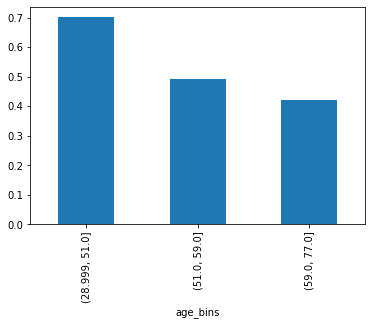

In [14]:
data['age_bins'] = pd.qcut(data['age'], q=3)
data.groupby(['age_bins'])[target_col].mean().plot(kind='bar')

In [15]:
eachCol = 'age'
eachCol+'_bins'

'age_bins'

In [16]:
for i in ['d','r','y']:
    print(i)

d
r
y


In [19]:
for index, i in enumerate(['d','r','y']):
    print(index, i)

0 d
1 r
2 y


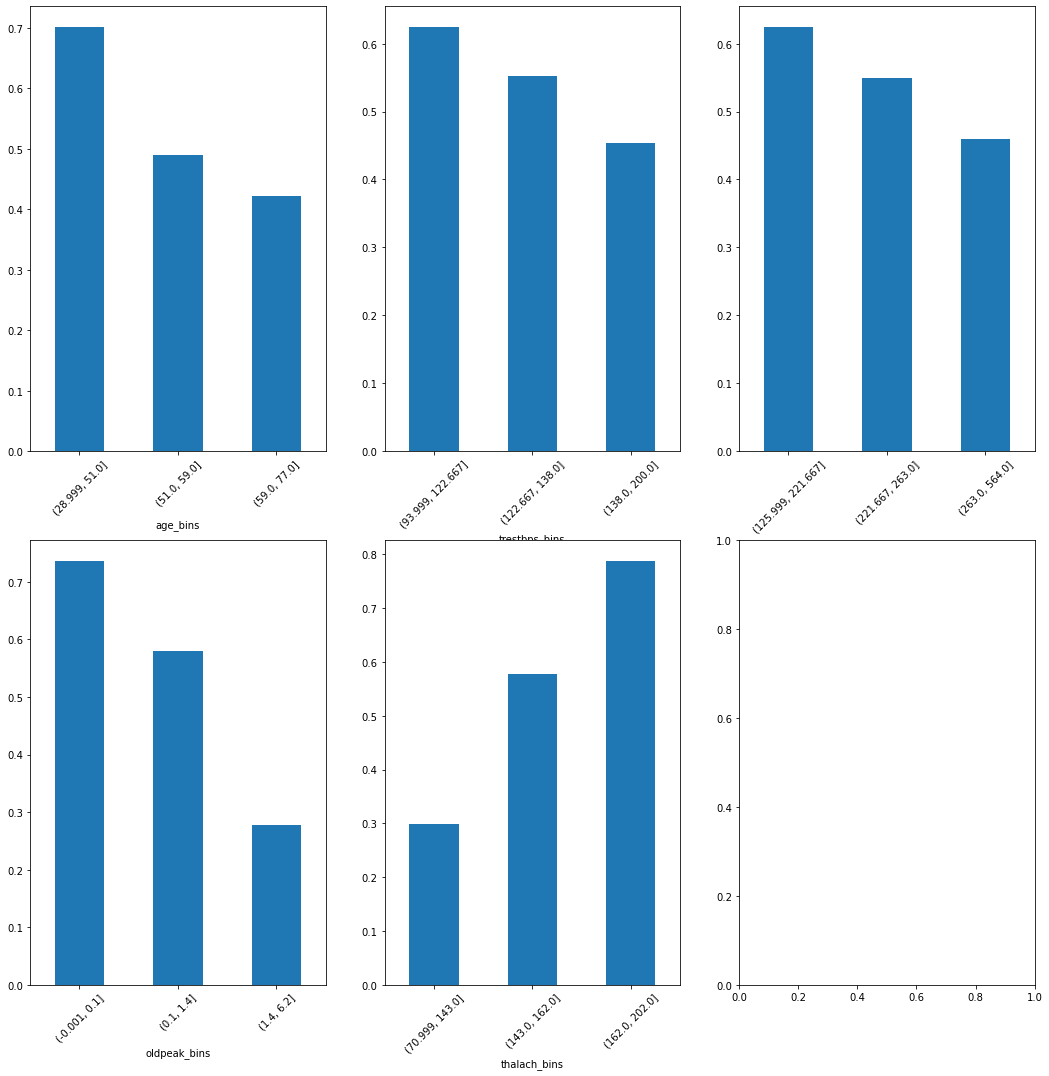

In [20]:
# numeric vs target (1/0)
num_cols = ['age','trestbps','chol','oldpeak', 'thalach']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18,18))

for indx, eachCol in enumerate(num_cols):  
    data[eachCol+'_bins'] = pd.qcut(data[eachCol], q=3)
    data.groupby([eachCol+'_bins'])[target_col].mean().plot(kind='bar', ax=axes[indx//3,indx%3],rot=45)

In [21]:
num_cols

['age', 'trestbps', 'chol', 'oldpeak', 'thalach']

In [22]:
cat_cols

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca']

In [23]:
num_cols+cat_cols

['age',
 'trestbps',
 'chol',
 'oldpeak',
 'thalach',
 'sex',
 'cp',
 'fbs',
 'restecg',
 'exang',
 'slope',
 'ca']

In [24]:
X = data[num_cols+cat_cols]
y = data[target_col]

X.shape, y.shape

((303, 12), (303,))

In [25]:
# training test split
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((212, 12), (91, 12), (212,), (91,))

In [26]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier(random_state=123)

params = {
    
    'max_depth' : [3, 5, 7],
    'min_samples_leaf' : [3, 5, 10]
    
}

grid = GridSearchCV(estimator=clf,
                   param_grid=params,
                   cv=3,
                   scoring='roc_auc')

grid.fit(X, y)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=123),
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_leaf': [3, 5, 10]},
             scoring='roc_auc')

In [ ]:
grid.best_params_

{'max_depth': 5, 'min_samples_leaf': 10}

In [ ]:
grid.best_score_ # test results

0.8521080368906455

In [ ]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=123)

In [ ]:
grid.cv_results_

{'mean_fit_time': array([0.00369803, 0.00338642, 0.00347797, 0.00356134, 0.00295758,
        0.00257428, 0.00342131, 0.00265773, 0.00280857]),
 'std_fit_time': array([1.01100506e-03, 4.37936288e-04, 8.83880761e-04, 7.83055431e-04,
        1.45765747e-04, 3.67140528e-05, 5.84318492e-04, 5.74103269e-05,
        2.75538651e-04]),
 'mean_score_time': array([0.00390108, 0.0027043 , 0.00218773, 0.00262308, 0.00226092,
        0.00215308, 0.00233801, 0.00239444, 0.00242758]),
 'std_score_time': array([1.31692721e-03, 2.63419648e-04, 4.25415182e-05, 2.92575704e-04,
        9.50069369e-05, 1.07423615e-04, 9.11628875e-05, 1.12384628e-04,
        2.32522621e-04]),
 'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(data=[3, 5, 10, 3, 5, 10, 3, 5, 10],
              mask=[False, False, Fals

In [ ]:
grid.best_estimator_.predict_proba(X)

array([[0.15384615, 0.84615385],
       [0.03030303, 0.96969697],
       [0.        , 1.        ],
       [0.30769231, 0.69230769],
       [0.36363636, 0.63636364],
       [0.5       , 0.5       ],
       [0.03030303, 0.96969697],
       [0.03030303, 0.96969697],
       [0.        , 1.        ],
       [0.15384615, 0.84615385],
       [0.18181818, 0.81818182],
       [0.35714286, 0.64285714],
       [0.03030303, 0.96969697],
       [0.15384615, 0.84615385],
       [0.3       , 0.7       ],
       [0.        , 1.        ],
       [0.3       , 0.7       ],
       [0.        , 1.        ],
       [0.18181818, 0.81818182],
       [0.        , 1.        ],
       [0.18181818, 0.81818182],
       [0.30769231, 0.69230769],
       [0.18181818, 0.81818182],
       [0.15384615, 0.84615385],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.15384615, 0.84615385],
       [0.35714286, 0.64285714],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.

In [ ]:
ads_data = pd.read_csv("advertising.csv")
ads_data.shape

(200, 5)

In [ ]:
ads_data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
X = ads_data[['TV','Radio','Newspaper']]
y = ads_data['Sales']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=123)

In [ ]:
from sklearn.tree  import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

reg = DecisionTreeRegressor(random_state=123)

params = {
    
    'max_depth' : [3, 5, 7],
    'min_samples_leaf' : [3, 5, 10]
    
}

grid = GridSearchCV(estimator=reg,
                   param_grid=params,
                   cv=5,
                   scoring='neg_root_mean_squared_error') #scoring='r2')

grid.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=123),
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_leaf': [3, 5, 10]},
             scoring='neg_root_mean_squared_error')

In [ ]:
grid.best_score_

-1.1409350167698835

In [ ]:
grid.best_params_

{'max_depth': 7, 'min_samples_leaf': 3}

In [ ]:
grid.best_estimator_

DecisionTreeRegressor(max_depth=7, min_samples_leaf=3, random_state=123)

In [ ]:
from sklearn.metrics import SCORERS
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [ ]:
grid.best_estimator_.predict(X_test)

array([11.2       ,  9.25555556, 14.3       ,  9.825     , 14.875     ,
       20.08333333, 12.36666667, 19.74      , 14.9       ,  7.73333333,
       11.78      , 22.46666667,  8.2       ,  6.76666667,  5.6       ,
       12.35      , 13.7       , 12.16666667,  6.76666667, 18.62      ,
        7.25      , 11.78      ,  8.76666667,  8.2       , 24.4       ,
        8.76666667, 10.9       , 15.825     , 11.78      , 22.46666667,
       10.925     , 21.9       , 26.2       ,  6.76666667, 14.9       ,
       20.08333333, 17.36666667, 19.74      , 17.1       , 10.9       ])